In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [8]:
data=pd.read_csv("F:\CSA\cyberthreat -Dataset - cyberthreat -Dataset.csv",lineterminator="\n")
data.head()

,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,No of Files affected,Packet Size,Target Variable\r
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,16.0,1024,Phishing\r
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,12.0,512,DoS\r
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,17.0,256,Man-in-the-Middle\r
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,NaN,128,DDoS\r
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,19.0,2048,SQL Injection\r


In [11]:
df=pd.DataFrame(data)
df=df.dropna()
df.head()

,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,No of Files affected,Packet Size,Target Variable\r
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,16.0,1024,Phishing\r
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,12.0,512,DoS\r
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,17.0,256,Man-in-the-Middle\r
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,19.0,2048,SQL Injection\r
5,UDP,ACK,SNMP,456789,234567,10.0.0.8,192.168.0.5,161,12345,9.0,768,Cross-Site Scripting\r


In [13]:
df_encoded = pd.get_dummies(df, columns=["Protocol", "Flag", "Packet"])
df_encoded.head()

,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,No of Files affected,Packet Size,Target Variable\r,Protocol_TCP,...,Flag_SYN,Packet_DHCP,Packet_DNS,Packet_FTP,Packet_HTTP,Packet_HTTPS,Packet_NTP,Packet_SMTP,Packet_SNMP,Packet_SSH
0,123456,987654,192.168.0.1,10.0.0.5,12345,80,16.0,1024,Phishing\r,True,...,True,False,False,False,True,False,False,False,False,False
1,987654,123456,10.0.0.2,192.168.0.1,53,12345,12.0,512,DoS\r,False,...,False,False,True,False,False,False,False,False,False,False
2,789012,345678,192.168.1.10,10.0.0.8,22,12345,17.0,256,Man-in-the-Middle\r,True,...,True,False,False,False,False,False,False,False,False,True
4,234567,456789,192.168.0.5,10.0.0.10,20,12345,19.0,2048,SQL Injection\r,True,...,False,False,False,True,False,False,False,False,False,False
5,456789,234567,10.0.0.8,192.168.0.5,161,12345,9.0,768,Cross-Site Scripting\r,False,...,False,False,False,False,False,False,False,False,True,False


In [35]:
numeric_data = data.drop(['Protocol', 'Packet', 'Flag', 'Source IP Address', 'Destination IP Address', 'Target Variable\r'], axis=1)
numeric_data=numeric_data.dropna()
kmeans=KMeans(n_clusters=3,random_state=42)
numeric_data['Clusters']=kmeans.fit_predict(numeric_data)

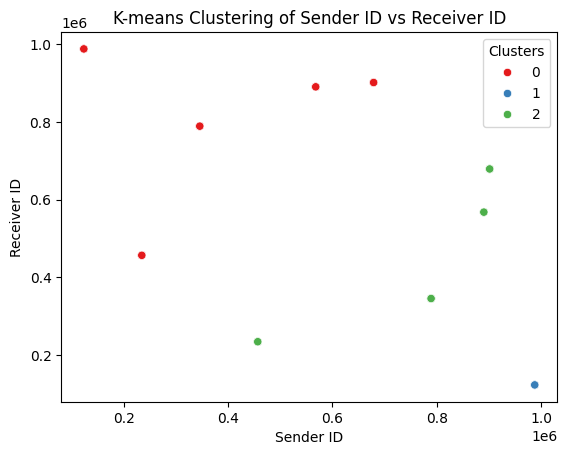

In [40]:
sns.scatterplot(data=numeric_data, x='Sender ID', y='Receiver ID', hue='Clusters', palette='Set1')
plt.title('K-means Clustering of Sender ID vs Receiver ID')
plt.xlabel('Sender ID')
plt.ylabel('Receiver ID')
plt.show()